In [54]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [55]:
category_names = ['Straight', 'Tilted', 'Empty']
PATH = os.getcwd()
def get_images(dir_name):
    new_dir = os.path.join(PATH, dir_name)
    images = []

    for cat in category_names:
        inner_dir = os.path.join(new_dir, cat)
        for image in os.listdir(inner_dir):
            image_path = os.path.join(inner_dir, image)
            images.append([image_path, cat])
    return images

In [68]:
train_images = get_images('train')
test_images = get_images('test')

train_df = pd.DataFrame(train_images, columns=['Image path', 'Category'])
test_df = pd.DataFrame(test_images, columns=['Image path', 'Category'])

In [69]:
total_images = len(train_df['Category']) + len(test_df['Category'])
total_train_images = len(train_df['Category'])
total_test_images = len(test_df['Category'])

cat_totals = []
cat_totals_train = []
cat_totals_test = []
pie_df = pd.DataFrame()
for cat in category_names:
    selected_train_images = len(train_df.loc[train_df['Category'] == cat])
    selected_test_images = len(test_df.loc[test_df['Category'] == cat])
    cat_totals.append([selected_test_images + selected_train_images, cat])
    cat_totals_train.append([selected_train_images,cat])
    cat_totals_test.append([selected_test_images,cat])

In [70]:
print('Total images: {}'.format(total_images))
print('Total training images: {}'.format(total_train_images))
print('Total testing images: {}\n'.format(total_test_images))

print('Total images per category: {}\n'.format(cat_totals))

print('Total training images per category: {}'.format(cat_totals_train))
print('Total testing images per category: {}'.format(cat_totals_test))

Total images: 650
Total training images: 489
Total testing images: 161

Total images per category: [[250, 'Straight'], [150, 'Tilted'], [250, 'Empty']]

Total training images per category: [[188, 'Straight'], [113, 'Tilted'], [188, 'Empty']]
Total testing images per category: [[62, 'Straight'], [37, 'Tilted'], [62, 'Empty']]


In [71]:
total_df = pd.DataFrame(cat_totals, columns=['Total', 'Category'])
total_df = total_df.set_index('Category')

total_train_df = pd.DataFrame(cat_totals_train, columns=['Total', 'Category'])
total_train_df = total_train_df.set_index('Category')

total_test_df = pd.DataFrame(cat_totals_test, columns=['Total', 'Category'])
total_test_df = total_test_df.set_index('Category')

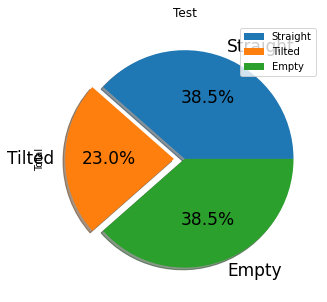

In [75]:
totals = cat_totals[0][0], cat_totals[1][0], cat_totals[2][0]
plot = total_test_df.plot(kind = 'pie', y='Total',figsize=(5, 5), title='Test',autopct='%1.1f%%',fontsize=17, shadow=True, explode=(0, 0.1, 0))
plt.savefig('uneven_split_test.jpg')

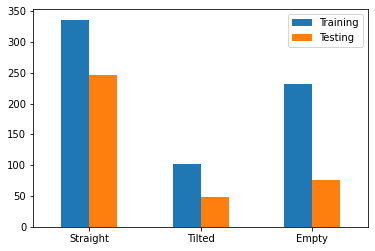

In [61]:
test_here = [583, 336, 247], [150, 102, 48], [308, 232, 76]
train_test_here = [336, 102, 232]
test_test_here = [247, 48, 76]
index = category_names

new_df_here = pd.DataFrame({'Training': train_test_here, 'Testing': test_test_here}, index=index)
ax = new_df_here.plot.bar(rot=0)
plt.savefig('original_bar_split.jpg')

In [62]:
straight_train = 336 / 583
straight_test = 247 / 583

tilted_train = 102 / 150
tilted_test = 48 / 150

empty_train = 232 / 308
empty_test = 76 / 308

In [63]:
print('Straight training: {:.2%}\nStraight testing: {:.2%}\n'.format(straight_train, straight_test))
print('Tilted training: {:.2%}\nTilted testing: {:.2%}\n'.format(tilted_train, tilted_test))
print('Tilted training: {:.2%}\nTilted testing: {:.2%}\n'.format(empty_train, empty_test))

Straight training: 57.63%
Straight testing: 42.37%

Tilted training: 68.00%
Tilted testing: 32.00%

Tilted training: 75.32%
Tilted testing: 24.68%

